In [17]:
import requests
import pandas as pd

In [18]:

url = "https://daily-petrol-diesel-lpg-cng-fuel-prices-in-india.p.rapidapi.com/v1/fuel-prices/history/india/maharashtra/mumbai"

headers = {
	"x-rapidapi-key": "3d72a3ed40mshf6f339ded999111p1a51e5jsn1003e2db0078",
	"x-rapidapi-host": "daily-petrol-diesel-lpg-cng-fuel-prices-in-india.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

response = response.json()

In [19]:
response

{'cityId': 'mumbai',
 'cityName': 'Mumbai',
 'stateId': 'maharashtra',
 'stateName': 'Maharashtra',
 'countryId': 'india',
 'countryName': 'India',
 'history': [{'applicableOn': '2025-07-15',
   'fuel': {'petrol': {'retailPrice': 103.49,
     'retailPriceChange': 0,
     'retailUnit': 'litre',
     'currency': 'INR',
     'retailPriceChangeInterval': 'day'},
    'diesel': {'retailPrice': 90.01,
     'retailPriceChange': 0,
     'retailUnit': 'litre',
     'currency': 'INR',
     'retailPriceChangeInterval': 'day'},
    'cng': {'retailPrice': 78,
     'retailPriceChange': 2,
     'retailUnit': 'kg',
     'currency': 'INR',
     'retailPriceChangeInterval': 'month'},
    'lpg': {'retailPrice': 852.5,
     'retailPriceChange': 0,
     'retailUnit': '14.2kg',
     'currency': 'INR',
     'retailPriceChangeInterval': 'month'}}},
  {'applicableOn': '2025-07-16',
   'fuel': {'petrol': {'retailPrice': 103.49,
     'retailPriceChange': 0,
     'retailUnit': 'litre',
     'currency': 'INR',
    

In [26]:
data = pd.DataFrame(response['history'])
data

,applicableOn,fuel
0,2025-07-15,"{'petrol': {'retailPrice': 103.49, 'retailPric..."
1,2025-07-16,"{'petrol': {'retailPrice': 103.49, 'retailPric..."
2,2025-07-17,"{'petrol': {'retailPrice': 103.49, 'retailPric..."
3,2025-07-18,"{'petrol': {'retailPrice': 103.49, 'retailPric..."
4,2025-07-19,"{'petrol': {'retailPrice': 103.49, 'retailPric..."
5,2025-07-20,"{'petrol': {'retailPrice': 103.49, 'retailPric..."
6,2025-07-21,"{'petrol': {'retailPrice': 103.49, 'retailPric..."
7,2025-07-22,"{'petrol': {'retailPrice': 103.49, 'retailPric..."
8,2025-07-23,"{'petrol': {'retailPrice': 103.49, 'retailPric..."
9,2025-07-24,"{'petrol': {'retailPrice': 103.49, 'retailPric..."


In [ ]:
print(type(response['history']))
print(response)

# hence history is a list not a dictionary we have to write the code bit differently

<class 'list'>


In [37]:
date = data.iloc[:, 0]
date

0     2025-07-15
1     2025-07-16
2     2025-07-17
3     2025-07-18
4     2025-07-19
5     2025-07-20
6     2025-07-21
7     2025-07-22
8     2025-07-23
9     2025-07-24
10    2025-07-25
11    2025-07-26
12    2025-07-27
13    2025-07-28
14    2025-07-29
15    2025-07-30
16    2025-07-31
17    2025-08-01
18    2025-08-02
19    2025-08-03
20    2025-08-04
21    2025-08-05
22    2025-08-06
23    2025-08-07
24    2025-08-08
25    2025-08-09
26    2025-08-10
27    2025-08-11
28    2025-08-12
29    2025-08-13
Name: applicableOn, dtype: object

### below there is two ways are mentioned for converting json data into pandas data frame, first one is a bit manual but the last one is the better one bcoz its easy to use

#### Type 1

In [ ]:
import pandas as pd

# Example: if response.json() already gives you this JSON
# For demonstration, let's assume it's stored in 'data'
data = response  # Your JSON from API

# Prepare list to hold flattened rows
rows = []

for entry in data['history']:
    row = {
        "Date": entry['applicableOn'],

        # we have to write the code like bcoz, each dictionary holds multiple nested dictionaries in it
        # Petrol details
        "Petrol Price": entry['fuel']['petrol']['retailPrice'],
        "Petrol Change": entry['fuel']['petrol']['retailPriceChange'],
        "Petrol Unit": entry['fuel']['petrol']['retailUnit'],

        # Diesel details
        "Diesel Price": entry['fuel']['diesel']['retailPrice'],
        "Diesel Change": entry['fuel']['diesel']['retailPriceChange'],
        "Diesel Unit": entry['fuel']['diesel']['retailUnit'],

        # CNG details
        "CNG Price": entry['fuel']['cng']['retailPrice'],
        "CNG Change": entry['fuel']['cng']['retailPriceChange'],
        "CNG Unit": entry['fuel']['cng']['retailUnit'],
        
        # LPG details
        "LPG Price": entry['fuel']['lpg']['retailPrice'],
        "LPG Change": entry['fuel']['lpg']['retailPriceChange'],
        "LPG Unit": entry['fuel']['lpg']['retailUnit'],
    }
    rows.append(row)

# Convert list of rows to DataFrame
df = pd.DataFrame(rows)

# Save to Excel
# df.to_excel("Mumbai_Fuel_Prices.xlsx", index=False)

df

,Date,Petrol Price,Petrol Change,Petrol Unit,Diesel Price,Diesel Change,Diesel Unit,CNG Price,CNG Change,CNG Unit,LPG Price,LPG Change,LPG Unit
0,2025-07-15,103.49,0,litre,90.01,0,litre,78,2,kg,852.5,0,14.2kg
1,2025-07-16,103.49,0,litre,90.01,0,litre,78,2,kg,852.5,0,14.2kg
2,2025-07-17,103.49,0,litre,90.01,0,litre,78,2,kg,852.5,0,14.2kg
3,2025-07-18,103.49,0,litre,90.01,0,litre,78,2,kg,852.5,0,14.2kg
4,2025-07-19,103.49,0,litre,90.01,0,litre,78,2,kg,852.5,0,14.2kg
5,2025-07-20,103.49,0,litre,90.01,0,litre,78,2,kg,852.5,0,14.2kg
6,2025-07-21,103.49,0,litre,90.01,0,litre,78,2,kg,852.5,0,14.2kg
7,2025-07-22,103.49,0,litre,90.01,0,litre,78,2,kg,852.5,0,14.2kg
8,2025-07-23,103.49,0,litre,90.01,0,litre,78,2,kg,852.5,0,14.2kg
9,2025-07-24,103.49,0,litre,90.01,0,litre,78,2,kg,852.5,0,14.2kg


#### Type 2

In [ ]:
data = response

df = pd.json_normalize(data['history'], sep='_')

# Add top-level fields manually to every row
top_fields = ['cityId', 'cityName', 'stateId', 'stateName', 'countryId', 'countryName']

for field in top_fields:
    df[field] = data[field]


# Reorder columns to put top-level fields in front
other_cols = [col for col in df.columns if col not in top_fields]
df = df[top_fields + other_cols]



# Optional: rename columns to be more readable
df.rename(columns={
    'applicableOn': 'Date',
    'fuel_petrol_retailPrice': 'Petrol Price',
    'fuel_petrol_retailPriceChange': 'Petrol Change',
    'fuel_petrol_retailUnit': 'Petrol Unit',
    'fuel_diesel_retailPrice': 'Diesel Price',
    'fuel_diesel_retailPriceChange': 'Diesel Change',
    'fuel_diesel_retailUnit': 'Diesel Unit',
    'fuel_cng_retailPrice': 'CNG Price',
    'fuel_cng_retailPriceChange': 'CNG Change',
    'fuel_cng_retailUnit': 'CNG Unit',
    'fuel_lpg_retailPrice': 'LPG Price',
    'fuel_lpg_retailPriceChange': 'LPG Change',
    'fuel_lpg_retailUnit': 'LPG Unit'
}, inplace=True)

# Save to Excel
df.to_excel("Mumbai_Fuel_Prices.xlsx", index=False)

df


,cityId,cityName,stateId,stateName,countryId,countryName,Date,Petrol Price,Petrol Change,Petrol Unit,...,CNG Price,CNG Change,CNG Unit,fuel_cng_currency,fuel_cng_retailPriceChangeInterval,LPG Price,LPG Change,LPG Unit,fuel_lpg_currency,fuel_lpg_retailPriceChangeInterval
0,mumbai,Mumbai,maharashtra,Maharashtra,india,India,2025-07-15,103.49,0,litre,...,78,2,kg,INR,month,852.5,0,14.2kg,INR,month
1,mumbai,Mumbai,maharashtra,Maharashtra,india,India,2025-07-16,103.49,0,litre,...,78,2,kg,INR,month,852.5,0,14.2kg,INR,month
2,mumbai,Mumbai,maharashtra,Maharashtra,india,India,2025-07-17,103.49,0,litre,...,78,2,kg,INR,month,852.5,0,14.2kg,INR,month
3,mumbai,Mumbai,maharashtra,Maharashtra,india,India,2025-07-18,103.49,0,litre,...,78,2,kg,INR,month,852.5,0,14.2kg,INR,month
4,mumbai,Mumbai,maharashtra,Maharashtra,india,India,2025-07-19,103.49,0,litre,...,78,2,kg,INR,month,852.5,0,14.2kg,INR,month
5,mumbai,Mumbai,maharashtra,Maharashtra,india,India,2025-07-20,103.49,0,litre,...,78,2,kg,INR,month,852.5,0,14.2kg,INR,month
6,mumbai,Mumbai,maharashtra,Maharashtra,india,India,2025-07-21,103.49,0,litre,...,78,2,kg,INR,month,852.5,0,14.2kg,INR,month
7,mumbai,Mumbai,maharashtra,Maharashtra,india,India,2025-07-22,103.49,0,litre,...,78,2,kg,INR,month,852.5,0,14.2kg,INR,month
8,mumbai,Mumbai,maharashtra,Maharashtra,india,India,2025-07-23,103.49,0,litre,...,78,2,kg,INR,month,852.5,0,14.2kg,INR,month
9,mumbai,Mumbai,maharashtra,Maharashtra,india,India,2025-07-24,103.49,0,litre,...,78,2,kg,INR,month,852.5,0,14.2kg,INR,month


When converting data to a pandas DataFrame, the data does NOT need to be only a dictionary—pandas supports several input formats:

![alt text](image.png) 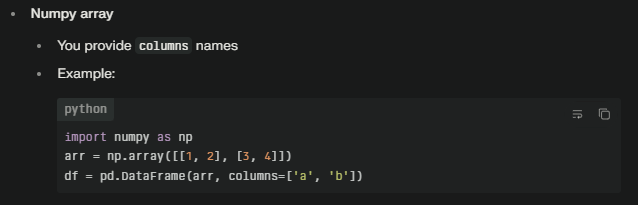



### What will NOT work directly:
A list of single values (without columns):
data = [1][2][3] gives you a single-column DataFrame, unless you give column names.

A completely nested or weird structure—pandas expects, at minimum, something "tabular": lists/arrays/dicts that map to rows and columns.